# Implementation of Gradient-Boost Algorithm

In [1]:
#Importing neccesary packages
# Load libraries
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Data Preparation

In [20]:
# Load data - Reading Boston Data
boston = load_boston()

data_X= pd.DataFrame(boston.data, columns=boston.feature_names) #Independent columns
#We will use data_X for indenpendent features in tranining data set
y = pd.Series(boston.target) #Dependent column - Median value of House
#y ##MEDV: Median value of owner-occupied homes in $1000s
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

In [18]:
#Viewing Data - predictors
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#Data Definition
#CRIM: Per capita crime rate by town
#ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
#INDUS: Proportion of non-retail business acres per town
#CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#NOX: Nitric oxide concentration (parts per 10 million)
#RM: Average number of rooms per dwelling
#AGE: Proportion of owner-occupied units built prior to 1940
#DIS: Weighted distances to five Boston employment centers
#RAD: Index of accessibility to radial highways

#TAX: Full-value property tax rate per $10,000

#PTRATIO: Pupil-teacher ratio by town
#B:  proportion of people of African American descent by town
#LSTAT: Percentage of lower status of the population
#MEDV: Median value of owner-occupied homes in $1000s

In [135]:
y[1:10] #response

1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
dtype: float64

In [23]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data_X, y, test_size=0.2) # 80% training and 20% test
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
121,0.07165,0.0,25.65,0.0,0.581,6.004,84.1,2.1974,2.0,188.0,19.1,377.67,14.27
32,1.38799,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,4.0,307.0,21.0,232.60,27.71
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
77,0.08707,0.0,12.83,0.0,0.437,6.140,45.8,4.0905,5.0,398.0,18.7,386.96,10.27
379,17.86670,0.0,18.10,0.0,0.671,6.223,100.0,1.3861,24.0,666.0,20.2,393.74,21.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.26363,0.0,8.56,0.0,0.520,6.229,91.2,2.5451,5.0,384.0,20.9,391.23,15.55
434,13.91340,0.0,18.10,0.0,0.713,6.208,95.0,2.2222,24.0,666.0,20.2,100.63,15.17
197,0.04666,80.0,1.52,0.0,0.404,7.107,36.6,7.3090,2.0,329.0,12.6,354.31,8.61
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10


# Model training and evaluation

In [24]:
# Create gradientboost REGRESSOR object
gradientregressor = GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)
#GradientBoostingRegressor : This is the boosting algorithm basicly it takes max_depth, n_estimators and learning_rate as inputs



#Important Parameters

#max_depth = depth of the tree
#n_estimators: Number of weak learners to train iteratively. We are saying in our example take 3 trees.

#learning_rate: It contributes to the weights of weak learners. It uses 1 as a default value.

In [25]:
# Train gradientboost REGRESSOR
#We are doing fitting on the train data
model = gradientregressor.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [26]:
#Here we see the rsquare of the model. The metric that resembles how good of your fitting.
#This number is coming without we are giving any extra effors so we'll try to improve this number
#In general any algorithms tries to minimize errors.
r2_score(y_pred,y_test)

0.7256692776238745

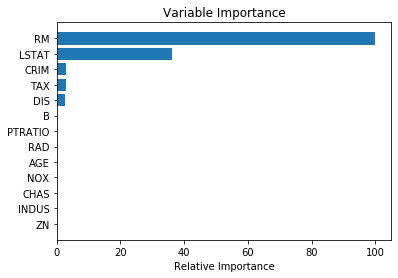

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot feature importance
feature_importance = model.feature_importances_
#This gives us which of the features in data_X are more important for our model.

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

#as we see RM, LSTAT and CRIM parameters more important variables here.

#RM: Average number of rooms per dwelling. 
Obviously numeber of rooms in the house decides the prices of the house.

#LSTAT : Percentage of lower status of the population
This also be an important parameter 

#CRIM: Per capita crime rate by town


#Until now we've found that these features are important parameters that affects the median house price. But is there are a way that we can improve the accuracy of the model. Right now we are at %72 . 

#So we are going to tune some hyperparameters. In above we started with random parameters in GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)

But we do not know what should be the optimal number of parameters for this particular data. We should tune the hyperparameters so that the model gives the best performance. 

# Lets tune the hyperparameters

In [28]:
from sklearn.model_selection import GridSearchCV
LR = {'learning_rate':[0.15,0.1,0.10,0.05], 'n_estimators':[100,150,200,250]}
#Here we want to run all of the combinations 

tuning = GridSearchCV(estimator =GradientBoostingRegressor(), 
            param_grid = LR, scoring='r2')
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.05, 'n_estimators': 150}, 0.8631715801507603)

This is a huge improvement from %77 to %86. 

So is is how we do Hyperparameter tuning in gradient boost.
Lets see the feature importance with this new parameters.


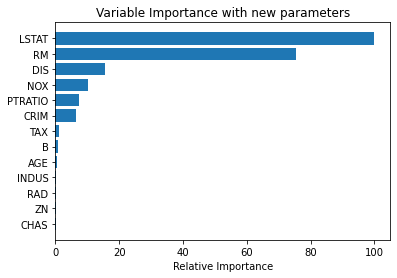

In [30]:
gradientregressor = GradientBoostingRegressor(max_depth=2,n_estimators=150,learning_rate=0.05)
model = gradientregressor.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
r2_score(y_pred,y_test)

feature_importance = model.feature_importances_
#This gives us which of the features in data_X are more important for our model.

# make importances relative to max importance
import matplotlib.pyplot as plt
%matplotlib inline
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance with new parameters')
plt.show()

We can see that #LSTAT becomes the top important feature and #CRIM feature position changed.

# Similarly other hyperparameters like max_depth, split criteria, min no of leaf nodes etc can be tuned

# Pros:
 
It iteratively corrects the mistakes of the weak classifier and improves accuracy by combining weak learners. Obviously all of the weak learners combined to make strong learner.

Gives better accuracy in most of the cases. 

# Cons:
Space and time complexity

Hyperparameter tuning